In [2]:
import numpy as np
import math
import pandas as pd
import hashlib, random
from sklearn.mixture import GaussianMixture
import copy
import itertools
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import jsonpickle
from random import shuffle
from collections import defaultdict
import os, json
from datetime import datetime
import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random, json
from tqdm import trange, tqdm
from operator import itemgetter
from analyzer import *
# import query_gen

# sns.set(style='ticks', palette='coolwarm') #this overwrites matplotlib setting so make it run first 
sns.set(style='ticks', palette='Paired') #this overwrites matplotlib setting so make it run first 

# def set_font():
import matplotlib
# http://ishxiao.com/blog/python/2017/07/23/how-to-change-the-font-size-on-a-matplotlib-plot.html

font = {'weight' : 'bold',
#         'size'   : 20,
       'family': 'Linux Libertine O'}
matplotlib.rc('font', **font)

In [3]:
#load results
#query and results are generated and collected using the unscaled intel dataset, but it is the same, because we didn't scale the time/data/light column.
#so no need to rerun it.

dir = "results/catchUp128/csv/"

re = RelativeError(dir, "groundtruth")
cntre, sumre, avgre = re.analyze(verbose=True, percentiles = [95])


Loaded baseline: compass.PASS_itime_light_128-1X-0.01-22198-0.02-2000.csv, 2000 rows
Loaded baseline: compass.PASS_itime_light_128-1X-0.01-22198-0.01-2000.csv, 2000 rows
Loaded baseline: compass.ReservoirSampling_itime_light-22198-0.01-2000.csv, 2000 rows
Loaded baseline: compass.PASS_itime_light_128-1X-0.01-22198-0.1-2000.csv, 2000 rows
Loaded baseline: compass.PASS_itime_light_128-1X-0.01-22198-0.03-2000.csv, 2000 rows
Loaded baseline: compass.PASS_itime_light_128-1X-0.01-22198-0.04-2000.csv, 2000 rows
Loaded baseline: compass.PASS_itime_light_128-1X-0.01-22198-0.05-2000.csv, 2000 rows
Loaded baseline: compass.PASS_itime_light_128-1X-0.01-22198-0.06-2000.csv, 2000 rows
Loaded baseline: compass.PASS_itime_light_128-1X-0.01-22198-0.07-2000.csv, 2000 rows
Loaded baseline: compass.PASS_itime_light_128-1X-0.01-22198-0.08-2000.csv, 2000 rows
Loaded baseline: compass.PASS_itime_light_128-1X-0.01-22198-0.09-2000.csv, 2000 rows
Loaded ground truth: compass.GroundTruthSolver_itime_light-221980

In [4]:
def get_nX_percentile(results, baseline, nX, percentile):
    template = {"PASS":"compass.PASS_itime_light_128-1X-0.01-22198-{cr}-2000.csv", 
                "ReservoirSampling":"compass.ReservoirSampling_itime_light-22198-0.01-2000.csv"}
    byCatchUpRate = {}
    crs = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,0.07,0.08,0.09,0.1]
    for cr in crs: 
        name = template[baseline]
        if baseline == "PASS":
            name =  template[baseline].format(nx=nX, cr=cr, baseline=baseline)
        print(name)
        byCatchUpRate[cr] = np.percentile(results[name], percentile)
    return byCatchUpRate

In [157]:
aggr = cntre
cnt_baselines = {
    "ReservoirSampling": get_nX_percentile(aggr, "ReservoirSampling", 1, 50),
    "DynamicPASS": get_nX_percentile(aggr, "PASS", 1, 50)
}

In [5]:
aggr = sumre
percentile = 95
sum_baselines1x = {
    "JanusAQP": get_nX_percentile(aggr, "PASS", 1, percentile),
    "RS": get_nX_percentile(aggr, "ReservoirSampling", 1, percentile),
}
sum_baselines1x


compass.PASS_itime_light_128-1X-0.01-22198-0.01-2000.csv
compass.PASS_itime_light_128-1X-0.01-22198-0.02-2000.csv
compass.PASS_itime_light_128-1X-0.01-22198-0.03-2000.csv
compass.PASS_itime_light_128-1X-0.01-22198-0.04-2000.csv
compass.PASS_itime_light_128-1X-0.01-22198-0.05-2000.csv
compass.PASS_itime_light_128-1X-0.01-22198-0.06-2000.csv
compass.PASS_itime_light_128-1X-0.01-22198-0.07-2000.csv
compass.PASS_itime_light_128-1X-0.01-22198-0.08-2000.csv
compass.PASS_itime_light_128-1X-0.01-22198-0.09-2000.csv
compass.PASS_itime_light_128-1X-0.01-22198-0.1-2000.csv
compass.ReservoirSampling_itime_light-22198-0.01-2000.csv
compass.ReservoirSampling_itime_light-22198-0.01-2000.csv
compass.ReservoirSampling_itime_light-22198-0.01-2000.csv
compass.ReservoirSampling_itime_light-22198-0.01-2000.csv
compass.ReservoirSampling_itime_light-22198-0.01-2000.csv
compass.ReservoirSampling_itime_light-22198-0.01-2000.csv
compass.ReservoirSampling_itime_light-22198-0.01-2000.csv
compass.ReservoirSampling

{'JanusAQP': {0.01: 0.0683344537388023,
  0.02: 0.05322909636414758,
  0.03: 0.044818568783338134,
  0.04: 0.04527688959777829,
  0.05: 0.042132451906344584,
  0.06: 0.038927173695228856,
  0.07: 0.037955837533980546,
  0.08: 0.03879098312438292,
  0.09: 0.03803551066434867,
  0.1: 0.03307652915537374},
 'RS': {0.01: 0.06851054911120333,
  0.02: 0.06851054911120333,
  0.03: 0.06851054911120333,
  0.04: 0.06851054911120333,
  0.05: 0.06851054911120333,
  0.06: 0.06851054911120333,
  0.07: 0.06851054911120333,
  0.08: 0.06851054911120333,
  0.09: 0.06851054911120333,
  0.1: 0.06851054911120333}}

In [6]:
#grep -i retrived *.log | awk '{print $5}'
#grep -i "processing done" *.log | awk '{print $4}'
#this is more expensive than prev result 0.1-0.5 because we doubled k.

loading=[
1708,
1703,
1884,
1876,
1893,
1978,
2138,
2297,
2476,
2432,
]
processing=[
214,
394,
569,
753,
870,
1021,
1158,
1438,
1613,
1637,
]

In [9]:
def linesubplot(ax, results, ticks, xlabel, ylabel):
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    markers = ['o', '^', '*', 'v', 'd', 'X', 'P', 'p', '4']
    linestyles= [':', '-.', '--', '-']

    font_size = 25
    xfont = {'weight' : 'bold',
            'size'   : font_size}
    width = 0.6
    our_color = "#3498db"
    baseline_color = "#95a5a6"

    baseline_perf = results
    results = list(baseline_perf.values())[0]
    x_labels = [x*2 for x in results.keys()]

    line_count = -1
    style = defaultdict(dict)

    idx = 0
    for legend, perf in baseline_perf.items():
        perf = list(perf.values())
        color = our_color if ('AQP' in legend) else baseline_color
        ax.plot(perf, label=legend, marker=markers[idx],  c = color, mfc = 'black', lw = 3, ms = 15)
        idx += 1

    ax.set_xticks(np.arange(len(ticks)))
    ax.set_xticklabels(ticks, fontsize=font_size-5)

    ax.legend(fontsize=20)

    ax.set_ylabel(ylabel, fontdict = xfont)
    ax.set_xlabel(xlabel, fontdict = xfont)
    ax.yaxis.set_tick_params(labelsize=font_size)

def twobarsubplot(ax, bar1, bar2, leg1, leg2, ticks, xlabel, ylabel):
    x = np.arange(len(bar1))  # the label locations
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    font_size = 25
    xfont = {'weight' : 'bold',
            'size'   : font_size}
    our_color = "#3498db"
    baseline_color = "#95a5a6"
    
    width = 0.4  # the width of the bars
    labels = range(1, len(bar1)+1)
    rects1 = ax.bar(x - width/2, bar1, width, label=leg1, hatch=patterns[0])#, color=baseline_color)
    rects2 = ax.bar(x + width/2, bar2, width, label=leg2, hatch=patterns[1])#, color=our_color)

    ax.set_xticks(np.arange(len(ticks)))
    ax.set_xticklabels(ticks, fontsize=font_size-5)

    ax.legend(fontsize=20)

    ax.set_ylabel(ylabel, fontdict = xfont)
    ax.set_xlabel(xlabel, fontdict = xfont)
    ax.yaxis.set_tick_params(labelsize=font_size)
    
    
def plot2(leftargs, leftfunc, rightargs, rightfunc, title = None, fname = None):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    font_size = 25
    xfont = {'weight' : 'bold',
            'size'   : font_size}
    our_color = "#3498db"
    baseline_color = "#95a5a6"

    leftargs['ax'] = axs[0]
    leftfunc(**leftargs)
    
    rightargs['ax'] = axs[1]
    rightfunc(**rightargs)

    fig.tight_layout()
    plt.show()
    if fname:
        fig.savefig("figures/"+fname+".pdf", bbox_inches='tight')

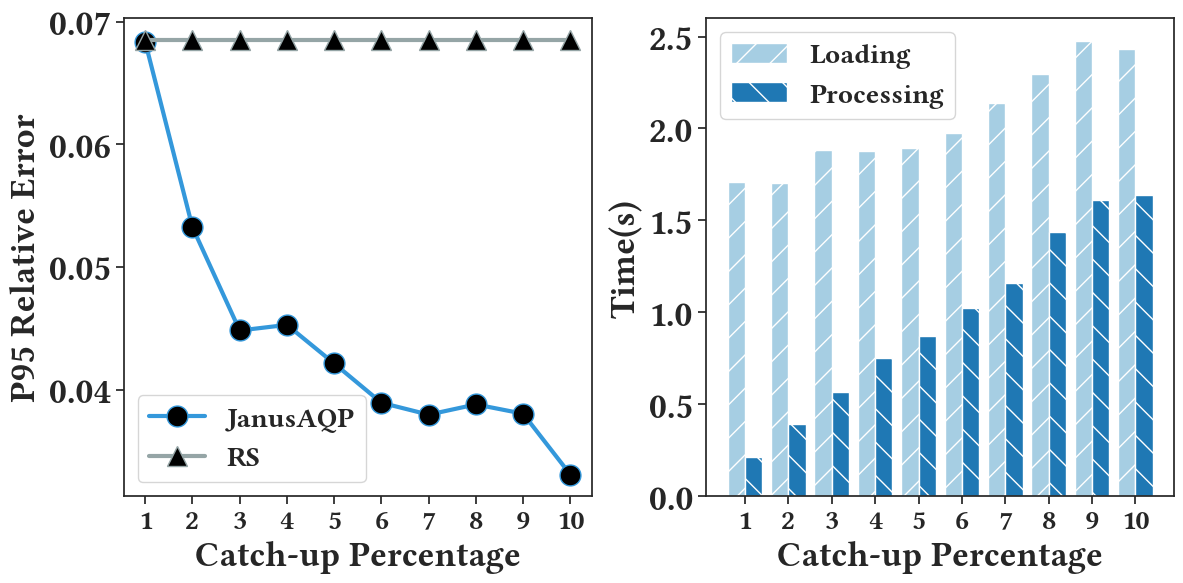

'LinLibertine_RB.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [10]:

largs = dict(results=sum_baselines1x,
             ticks=[x for x in range(1, 11)], 
             xlabel="Catch-up Percentage", 
             ylabel="P95 Relative Error"
            )

rargs = dict(bar1=[x/1000 for x in loading], 
             bar2=[x/1000 for x in processing], 
             ticks=[x for x in range(1, 11)], 
             leg1="Loading", 
             leg2="Processing", 
             xlabel="Catch-up Percentage", 
             ylabel="Time(s)")

plot2(largs, linesubplot, rargs, twobarsubplot, fname="catchup-intelfull-2k-p95re-time-128")